In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from candle import Trainer
from candle.metrics import Accuracy, Precision
from candle.models.vision import BasicCNNClassifier
from candle.callbacks import EarlyStopping, ConsoleLogger

In [2]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [3]:
model = BasicCNNClassifier(input_shape = (1,64,64), num_output_classes=10)

In [4]:
accuracy = Accuracy(binary_output=False)
precision = Precision(binary_output=False)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
es = EarlyStopping(basis="val_accuracy", metric_minimize=False, patience=10, threshold=0.85)
cl = ConsoleLogger()


In [6]:
trainer = Trainer( model,
                 criterion=loss_fn,
                 optimizer=optimizer,
                 metrics=[accuracy, precision],
                 callbacks=[es, cl],
                 device=torch.device('cuda'),
                 use_amp=True # Mixed precision training
                   )

In [7]:
history = trainer.fit(train_loader,val_loader, epochs=2)

---------------------------------------------Progress---------------------------------------------
EPOCH 0: 100%|██████████| 938/938 [00:29<00:00, 31.64it/s]
--> Metrics:   accuracy: 0.9760 ,val_accuracy: 0.9884 ,precision: 0.9734 ,val_precision: 0.9889 ,loss: 0.1002 ,val_loss: 0.0397
Time elapsed: 33.387945890426636 s
----------------------------------------------------------------------------------------------------
EPOCH 1: 100%|██████████| 938/938 [00:25<00:00, 36.38it/s]
--> Metrics:   accuracy: 0.9891 ,val_accuracy: 0.9885 ,precision: 0.9874 ,val_precision: 0.9885 ,loss: 0.0358 ,val_loss: 0.0335
Time elapsed: 62.39632272720337 s
----------------------------------------------------------------------------------------------------


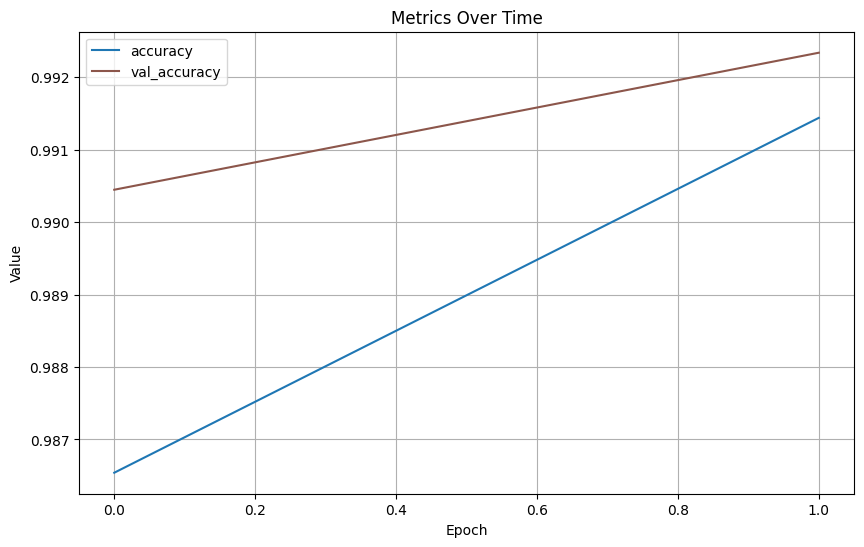

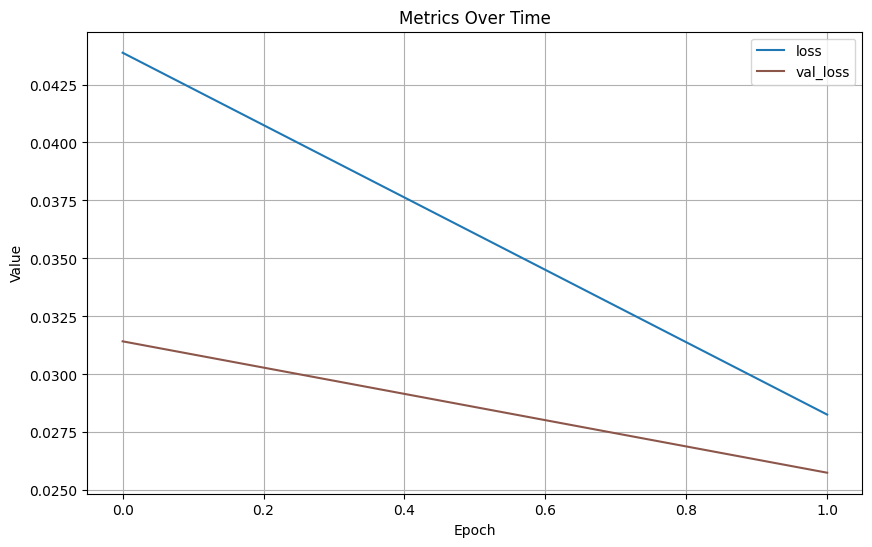

In [9]:
trainer.tracker.plot('accuracy', 'val_accuracy')
trainer.tracker.plot('loss', 'val_loss')

In [11]:
# trainer.save_progress(path="path/to/save", metric_name="val_accuracy")
trainer.save_progress(path="temp/saves", metric_name="val_accuracy")

Successfully saved progress!
